In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# importing voting classifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Group_7_data_cleaned.csv")

In [3]:
df.drop(columns=['Date','Time'], inplace=True)

In [4]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.77,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.65,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.52,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.39,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.25,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  int64  
 5   S2_Light              10129 non-null  int64  
 6   S3_Light              10129 non-null  int64  
 7   S4_Light              10129 non-null  int64  
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  int64  
 13  S5_CO2_Slope          10129 non-null  float64
 14  S6_PIR                10129 non-null  int64  
 15  S7_PIR             

In [6]:
df_wo_light = df.drop(df.filter(regex='Light').columns, axis=1)

In [7]:
df_wo_light.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,0.08,0.19,0.06,0.06,390,0.77,0,0,1
1,24.94,24.75,24.56,25.44,0.93,0.05,0.06,0.06,390,0.65,0,0,1
2,25.00,24.75,24.50,25.44,0.43,0.11,0.08,0.06,390,0.52,0,0,1
3,25.00,24.75,24.56,25.44,0.41,0.10,0.10,0.09,390,0.39,0,0,1
4,25.00,24.75,24.56,25.44,0.18,0.06,0.06,0.06,390,0.25,0,0,1


In [8]:
X_wo_light = df_wo_light.drop(['Room_Occupancy_Count'], axis=1)
y_wo_light = df_wo_light[['Room_Occupancy_Count']]

In [9]:
# Splitting the dataset into train and test
X_train_wo_light, X_test_wo_light, y_train_wo_light, y_test_wo_light = train_test_split(X_wo_light, y_wo_light, test_size=0.2, random_state=42)

In [10]:
# Scaling the dataset
scaler = StandardScaler()
X_train_scaled_wo_light = scaler.fit_transform(X_train_wo_light)
X_test_scaled_wo_light = scaler.transform(X_test_wo_light)

# Ensemble Learning

The ensemble learning is combining multiple learning algorithms together for better performance than the
individual learning model. The main idea is the principle of "the wisdom of the crowd".

The ensemble models typically have better accuracy (lower error), and reduce both bias and variance.

## 1. Voting Classifier

A majority voting model combines multiple models' predictions to make a final prediction. In classification, there are two approaches to getting the final prediction in classification:

- __Hard Voting:-__ Summing the predictions of each class from all the models and predicting the class with the most votes.

- __Soft Voting:-__ Summing the predicted probabilities for each class from all the models and predicting the class with the largest summed probability.

In [11]:
# initializing all the model objects with default parameters
model_1 = SGDClassifier(alpha=0.001, loss= 'log', penalty= 'none', random_state=42)
model_2 = KNeighborsClassifier(n_neighbors= 4, p= 1, weights= 'distance')
model_3 = DecisionTreeClassifier(criterion= 'entropy',max_depth= 12,max_leaf_nodes= 40,min_samples_leaf= 2,min_samples_split= 2)
model_4 = RandomForestClassifier(bootstrap= 'False', max_depth= 40, max_features= 'log2', n_estimators= 200)
model_5 = SVC(kernel = 'linear', C = 100)
model_6 = SVC(kernel = 'rbf', C = 100, gamma = 0.01)
model_7 = MLPClassifier(hidden_layer_sizes = (100, 100), learning_rate = 'constant', solver = 'adam')

In [12]:
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('sgd', model_1), 
                ('knn', model_2), 
                ('dt', model_3),
                ('rn', model_4),
                ('svcl', model_5),
                ('svcnl', model_6),
                ('dl', model_7)], voting='hard')

In [13]:
# training all the model on the train dataset
final_model.fit(X_train_scaled_wo_light, y_train_wo_light)

VotingClassifier(estimators=[('sgd',
                              SGDClassifier(alpha=0.001, loss='log',
                                            penalty='none', random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=4, p=1,
                                                   weights='distance')),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=12,
                                                     max_leaf_nodes=40,
                                                     min_samples_leaf=2)),
                             ('rn',
                              RandomForestClassifier(bootstrap='False',
                                                     max_depth=40,
                                                     max_features='log2',
                                                     n_estimators=200)),
                             ('svcl', SVC(C=100, kernel='linear')),
                             ('svcnl', SVC(C=100, gamma=0.01)),
                             ('dl',
                              MLPClassifier(hidden_layer_sizes=(100, 100)))])

In [14]:
# predicting the output on the test dataset
pred_final = final_model.predict(X_test_scaled_wo_light)

In [15]:
print("Accuracy on train set: ", final_model.score(X_train_scaled_wo_light, y_train_wo_light))
print("Accuracy on test set: ", final_model.score(X_test_scaled_wo_light, y_test_wo_light))

Accuracy on train set:  0.9953103788720227
Accuracy on test set:  0.9856860809476802


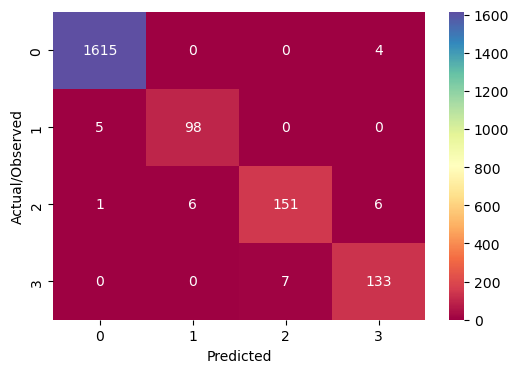

In [16]:
cm = confusion_matrix(y_test_wo_light, pred_final)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [17]:
# Classification Report
print(classification_report(y_test_wo_light, pred_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.94      0.95      0.95       103
           2       0.96      0.92      0.94       164
           3       0.93      0.95      0.94       140

    accuracy                           0.99      2026
   macro avg       0.96      0.95      0.96      2026
weighted avg       0.99      0.99      0.99      2026



In [18]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, pred_final)
weighted_precision = precision_score(y_test_wo_light, pred_final, average='weighted')
weighted_recall = recall_score(y_test_wo_light, pred_final, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, pred_final, average='weighted')

# Creating an evaluation metrics dataframe for the model
results = pd.DataFrame([['Ensemble: Majority Voting', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Ensemble: Majority Voting,98.57,98.57,98.57,98.57


## 2. Stacking

Stacking is an ensemble learning method that combines multiple heterogeneous learning models via a meta-estimator. The individual models are trained on the complete training dataset and the meta-estimator is fitted based on the outputs – meta-features – of the individual models in the ensemble.

Diversity comes from different machine learning models used as ensemble members

In [19]:
# initializing all the model objects with default parameters
model_1 = SGDClassifier(alpha=0.001, loss= 'log', penalty= 'none', random_state=42)
model_2 = KNeighborsClassifier(n_neighbors= 4, p= 1, weights= 'distance')
model_3 = DecisionTreeClassifier(criterion= 'entropy',max_depth= 12,max_leaf_nodes= 40,min_samples_leaf= 2,min_samples_split= 2)
model_4 = RandomForestClassifier(bootstrap= 'False', max_depth= 40, max_features= 'log2', n_estimators= 200)
model_5 = SVC(kernel = 'linear', C = 100)
model_6 = SVC(kernel = 'rbf', C = 100, gamma = 0.01)
model_7 = MLPClassifier(hidden_layer_sizes = (100, 100), learning_rate = 'constant', solver = 'adam')

In [20]:
# Making the final model using voting classifier
final_model = StackingClassifier(
    estimators=[('sgd', model_1), 
                ('knn', model_2), 
                ('dt', model_3),
                ('rn', model_4),
                ('svcl', model_5),
                ('svcnl', model_6),
                ('dl', model_7)],
    final_estimator=RandomForestClassifier(),
    cv=5,
    passthrough=True
)

In [21]:
# training all the model on the train dataset
final_model.fit(X_train_scaled_wo_light, y_train_wo_light)

StackingClassifier(cv=5,
                   estimators=[('sgd',
                                SGDClassifier(alpha=0.001, loss='log',
                                              penalty='none',
                                              random_state=42)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=4, p=1,
                                                     weights='distance')),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=12,
                                                       max_leaf_nodes=40,
                                                       min_samples_leaf=2)),
                               ('rn',
                                RandomForestClassifier(bootstrap='False',
                                                       max_depth=40,
                                                       max_features='log2',
                                                       n_estimators=200)),
                               ('svcl', SVC(C=100, kernel='linear')),
                               ('svcnl', SVC(C=100, gamma=0.01)),
                               ('dl',
                                MLPClassifier(hidden_layer_sizes=(100, 100)))],
                   final_estimator=RandomForestClassifier(), passthrough=True)

In [22]:
# predicting the output on the test dataset
pred_final = final_model.predict(X_test_scaled_wo_light)

In [23]:
print("Accuracy on train set: ", final_model.score(X_train_scaled_wo_light, y_train_wo_light))
print("Accuracy on test set: ", final_model.score(X_test_scaled_wo_light, y_test_wo_light))

Accuracy on train set:  0.9998765889176848
Accuracy on test set:  0.9945705824284304


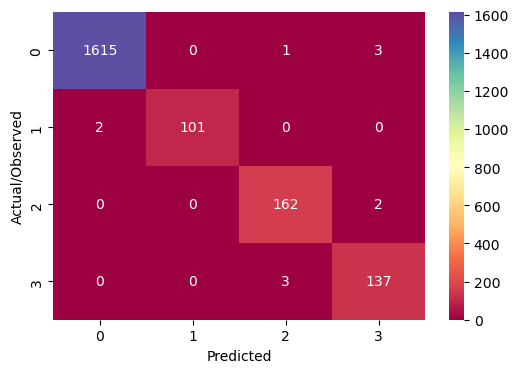

In [24]:
cm = confusion_matrix(y_test_wo_light, pred_final)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [25]:
# Classification Report
print(classification_report(y_test_wo_light, pred_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      0.98      0.99       103
           2       0.98      0.99      0.98       164
           3       0.96      0.98      0.97       140

    accuracy                           0.99      2026
   macro avg       0.98      0.99      0.99      2026
weighted avg       0.99      0.99      0.99      2026



In [26]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, pred_final)
weighted_precision = precision_score(y_test_wo_light, pred_final, average='weighted')
weighted_recall = recall_score(y_test_wo_light, pred_final, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, pred_final, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['Ensemble: Stacking', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Ensemble: Majority Voting,98.57,98.57,98.57,98.57
1,Ensemble: Stacking,99.46,99.46,99.46,99.46
